# Linear Discriminant Analysis

In [1]:
library(MASS)

## Define three clusters 

### All clusters should have the same covariance matrix

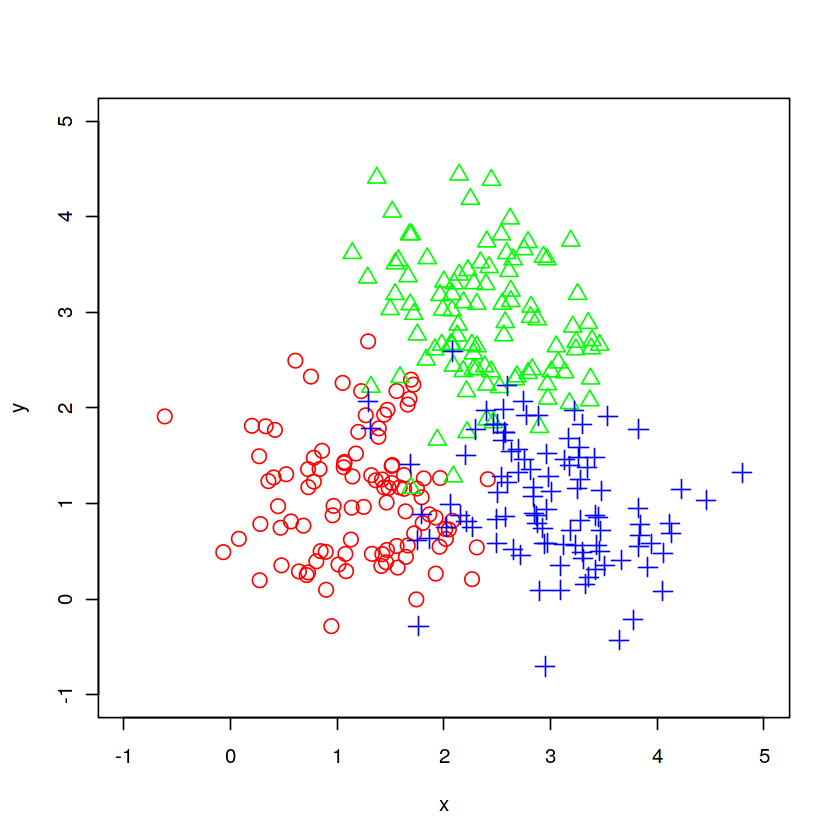

In [96]:
set.seed(25)
M=diag(c(.4,.4))
cloud1=mvrnorm(n=100,mu=c(1.2,1.2),Sigma=M)
cloud2=mvrnorm(n=100,mu=c(2.4,2.9),Sigma=M)
cloud3=mvrnorm(n=100,mu=c(3,1),Sigma=M)
#pdf("LDA-input-clusters.pdf")
plot(cloud1,col="red",xlim=c(-1,5),ylim=c(-1,5),
     cex=1.5,pch=1, xlab="x",ylab="y")
points(cloud2,col="green",cex=1.5,pch=2)
points(cloud3,col="blue",cex=1.5,pch=3)
#dev.off()

## Supervised Learning: Need labels for each cluster

In [81]:
labels=c(rep(1,nrow(cloud1)), 
         rep(2,nrow(cloud2)), 
         rep(3,nrow(cloud3)))

## Create a data frame with the coordinates of all the data

## Make sure the data is in the same order as the labels!

In [30]:
data=rbind(cloud1,cloud2,cloud3)
colnames(data)=c("x","y")
data=data.frame(data)
head(data)

x,y
1.5908242,0.86602467
2.1074200,0.34123993
1.2218497,0.27058426
1.3148203,1.20335437
0.5121715,0.05123456
1.4394973,0.71822002


## Extract indices for a training subset

## These indices will also be use to build the test set 

In [82]:
ind=sample(1:nrow(data),.75*nrow(data))

In [83]:
test.data=data[-ind,]

## Do LDA on the subset of rows specified by the indices ind

In [84]:
model=lda(data,grouping=labels,subset=ind)

In [85]:
print(model)

Call:
lda(data, grouping = labels, subset = ind)

Prior probabilities of groups:
        1         2         3 
0.3244444 0.3244444 0.3511111 

Group means:
         x         y
1 1.026256 0.8661609
2 2.498233 2.9739489
3 2.947518 1.0438932

Coefficients of linear discriminants:
        LD1        LD2
x -1.230865 -1.1396152
y -1.189829  0.9352518

Proportion of trace:
   LD1    LD2 
0.7383 0.2617 


In [101]:
predictions=predict(model,test.data)
the.classes=predictions$class
predicted.classes=as.numeric(as.character(the.classes))
#predicted.classes=as.numeric(as.character(predict(model,test.data)$class))
#npre=nrow(test.data)

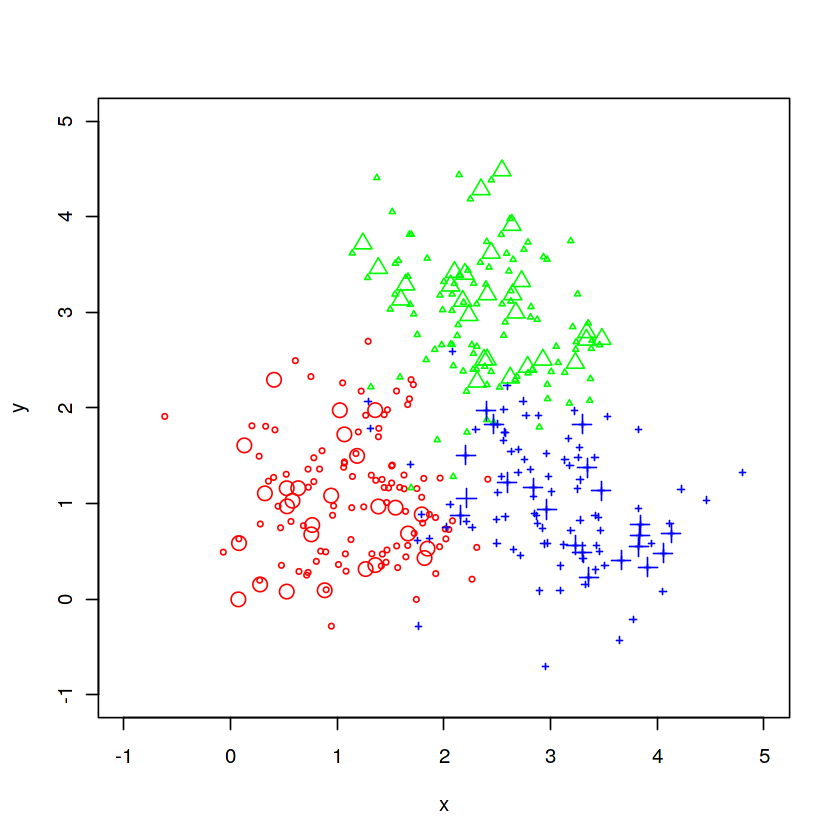

In [102]:
#pdf("LDA-predictions.pdf")
npred=nrow(test.data)
plot(cloud1,col="red",xlim=c(-1,5),ylim=c(-1,5),
     cex=.5,pch=1, xlab="x",ylab="y")
points(cloud2,col="green",cex=.5,pch=2)
points(cloud3,col="blue",cex=.5,pch=3)
the.colors=c("red","green","blue")
the.markers=c(1,2,3)
for (j in 1:npre){
    the.class=predicted.classes[j]
    the.point=test.data[j,]
    points(the.point, col=the.colors[the.class], 
           pch=the.markers[the.class], cex=1.5)
    
}
#dev.off()

# Quadratic Discriminant Analysis

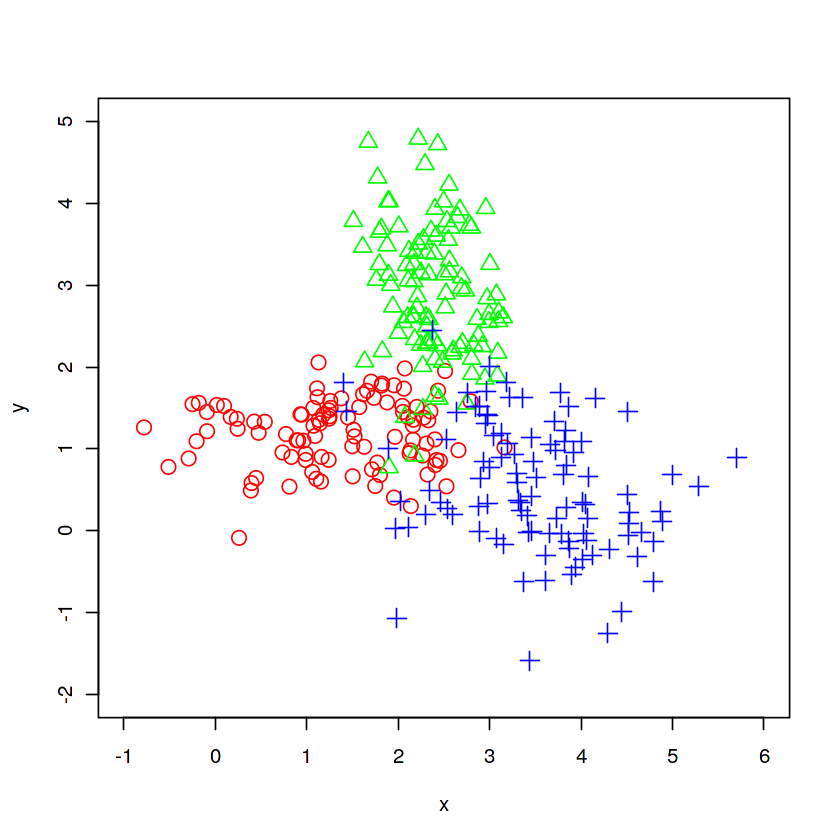

In [125]:
set.seed(25)
#M=diag(c(.4,.4))
cloud1=mvrnorm(n=100,mu=c(1.2,1.2),Sigma=diag(c(.7,.2)))
cloud2=mvrnorm(n=100,mu=c(2.4,2.9),Sigma=diag(c(.2,.6)))
cloud3=mvrnorm(n=100,mu=c(3.5,.5),Sigma=diag(c(.6,.6)))
#pdf("QDA-input-clusters.pdf")
plot(cloud1,col="red",xlim=c(-1,6),ylim=c(-2,5),
     cex=1.5,pch=1, xlab="x",ylab="y")
points(cloud2,col="green",cex=1.5,pch=2)
points(cloud3,col="blue",cex=1.5,pch=3)
#dev.off()

In [112]:
labels=c(rep(1,nrow(cloud1)), 
         rep(2,nrow(cloud2)), 
         rep(3,nrow(cloud3)))

In [113]:
data=rbind(cloud1,cloud2,cloud3)
colnames(data)=c("x","y")
data=data.frame(data)
head(data)

x,y
1.3772327,1.6177758
2.0714577,1.9830642
2.1649263,1.3568714
0.9309874,1.4226116
2.4550987,0.8550531
1.5727599,1.5107715


In [114]:
ind=sample(1:nrow(data),.75*nrow(data))
test.data=data[-ind,]

In [115]:
model=qda(data,grouping=labels,subset=ind)

In [116]:
print(model)

Call:
qda(data, grouping = labels, subset = ind)

Prior probabilities of groups:
        1         2         3 
0.3244444 0.3244444 0.3511111 

Group means:
         x        y
1 1.377052 1.218566
2 2.398751 2.868094
3 3.435724 0.553758


In [117]:
predictions=predict(model,test.data)
the.classes=predictions$class
predicted.classes=as.numeric(as.character(the.classes))


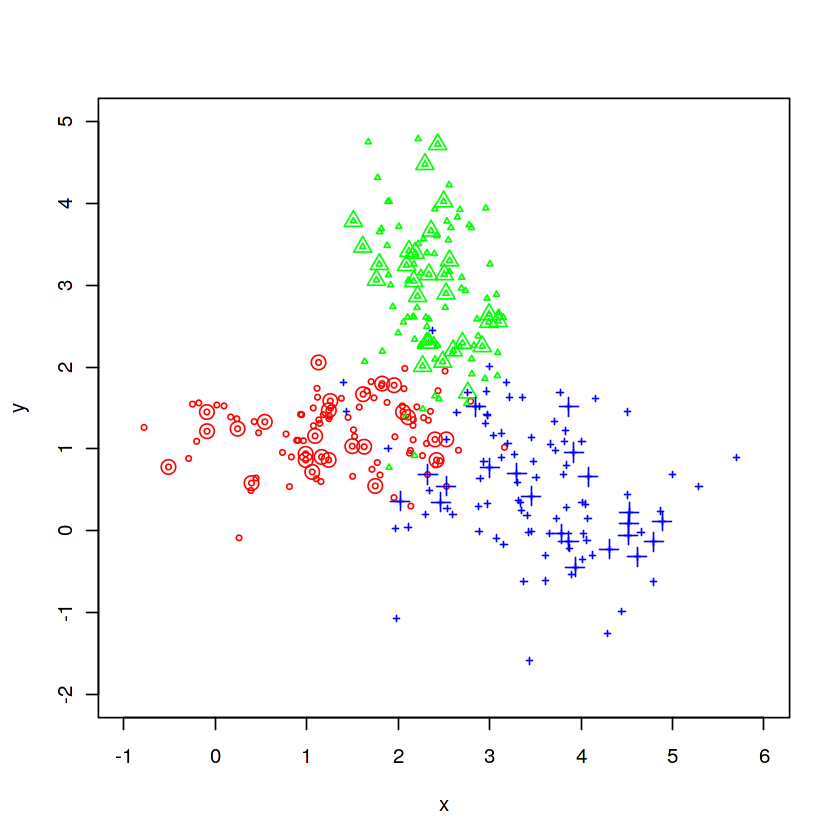

In [123]:
#pdf("QDA-predictions.pdf")
npred=nrow(test.data)
plot(cloud1,col="red",xlim=c(-1,6),ylim=c(-2,5),
     cex=.5,pch=1, xlab="x",ylab="y")
points(cloud2,col="green",cex=.5,pch=2)
points(cloud3,col="blue",cex=.5,pch=3)
the.colors=c("red","green","blue")
the.markers=c(1,2,3)
for (j in 1:npre){
    the.class=predicted.classes[j]
    the.point=test.data[j,]
    points(the.point, col=the.colors[the.class], 
           pch=the.markers[the.class], cex=1.5) 
}
#dev.off()